# 导入需要的包

In [1]:
#导包
import numpy as np
import pandas as pd
#导入线性回归模型
from sklearn.linear_model import LinearRegression
#数据集切分
from sklearn.model_selection import train_test_split
#交叉验证
from sklearn.model_selection import cross_val_score
# 设置全部行输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import seaborn as sns

# 数据探索

In [2]:
#导入数据集，探索数据
data = pd.read_csv('kc_train.csv',encoding='GBK')
data.head()

,销售日期,销售价格,卧室数,浴室数,房屋面积,停车面积,楼层数,房屋评分,建筑面积,地下室面积,建筑年份,修复年份,纬度,经度
0,20150302,545000,3,2.25,1670,6240,1.0,8,1240,430,1974,0,47.6413,-122.113
1,20150211,785000,4,2.50,3300,10514,2.0,10,3300,0,1984,0,47.6323,-122.036
2,20150107,765000,3,3.25,3190,5283,2.0,9,3190,0,2007,0,47.5534,-122.002
3,20141103,720000,5,2.50,2900,9525,2.0,9,2900,0,1989,0,47.5442,-122.138
4,20140603,449500,5,2.75,2040,7488,1.0,7,1200,840,1969,0,47.7289,-122.172


In [3]:
data.info()
data.shape
data['销售价格'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
销售日期     10000 non-null int64
销售价格     10000 non-null int64
卧室数      10000 non-null int64
浴室数      10000 non-null float64
房屋面积     10000 non-null int64
停车面积     10000 non-null int64
楼层数      10000 non-null float64
房屋评分     10000 non-null int64
建筑面积     10000 non-null int64
地下室面积    10000 non-null int64
建筑年份     10000 non-null int64
修复年份     10000 non-null int64
纬度       10000 non-null float64
经度       10000 non-null float64
dtypes: float64(4), int64(10)
memory usage: 1.1 MB


(10000, 14)

450000     78
350000     77
325000     77
550000     76
500000     74
400000     73
375000     72
425000     67
300000     65
250000     63
330000     62
525000     59
575000     54
600000     54
475000     53
315000     53
270000     51
280000     51
290000     51
465000     50
390000     49
320000     47
380000     47
415000     46
265000     46
310000     46
435000     46
490000     45
540000     45
275000     45
           ..
1681000     1
476500      1
894400      1
796000      1
902500      1
410988      1
118125      1
968060      1
132500      1
576925      1
398750      1
302495      1
148900      1
878000      1
834995      1
234950      1
1468000     1
767450      1
640500      1
869900      1
208417      1
606500      1
210490      1
681500      1
616000      1
829000      1
685650      1
955990      1
542300      1
2048000     1
Name: 销售价格, Length: 2590, dtype: int64

# 数据可视化

## 绘制散点图

In [4]:
#windows电脑电脑正常显示中文
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

<Figure size 1080x1440 with 0 Axes>

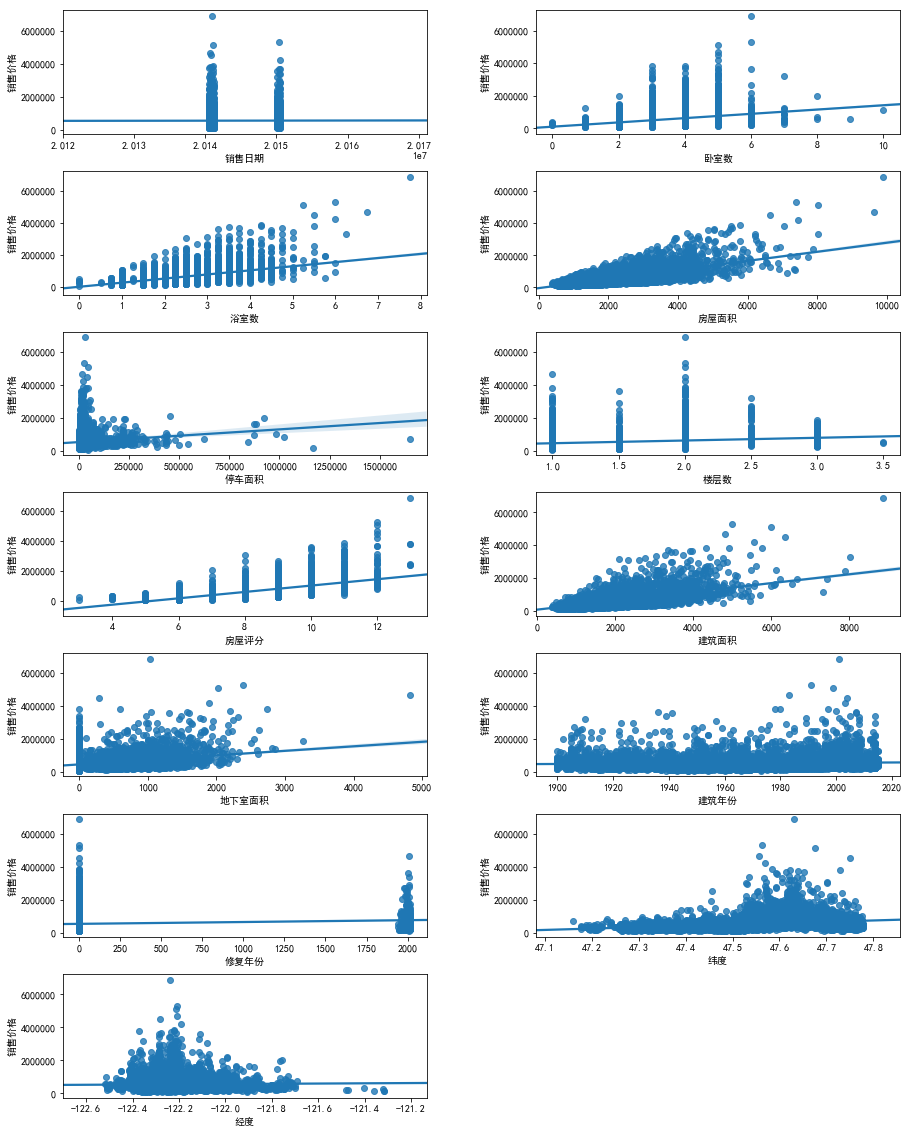

In [5]:
n =1
plt.figure(figsize=(15,20))
for i in data.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13]]:
    plt.subplot(7,2,n)
    n += 1
    plt.subplots_adjust(wspace=0.3)
    plt.subplots_adjust(hspace=0.3)
    #建立回归线
    sns.regplot(x = data[i],y = data['销售价格'],data = data)
    

In [6]:
data.corr()

,销售日期,销售价格,卧室数,浴室数,房屋面积,停车面积,楼层数,房屋评分,建筑面积,地下室面积,建筑年份,修复年份,纬度,经度
销售日期,1.000000,0.006070,-0.015090,-0.029309,-0.035719,0.023240,-0.020392,-0.025199,-0.025853,-0.025794,0.006585,-0.025049,-0.029335,-0.000391
销售价格,0.006070,1.000000,0.314395,0.533221,0.698923,0.094499,0.240563,0.667086,0.600657,0.328690,0.059483,0.120399,0.304946,0.027786
卧室数,-0.015090,0.314395,1.000000,0.526866,0.588612,0.044489,0.167250,0.364587,0.485420,0.314762,0.156522,0.021880,-0.001033,0.137799
浴室数,-0.029309,0.533221,0.526866,1.000000,0.757294,0.095840,0.492833,0.671609,0.683691,0.295099,0.508424,0.045541,0.029971,0.222883
房屋面积,-0.035719,0.698923,0.588612,0.757294,1.000000,0.178122,0.339334,0.764166,0.875399,0.440576,0.315527,0.054527,0.052305,0.247892
停车面积,0.023240,0.094499,0.044489,0.095840,0.178122,1.000000,-0.003487,0.119794,0.184282,0.025821,0.047090,0.007255,-0.082037,0.205590
楼层数,-0.020392,0.240563,0.167250,0.492833,0.339334,-0.003487,1.000000,0.451660,0.511583,-0.248899,0.496363,0.007071,0.052710,0.126969
房屋评分,-0.025199,0.667086,0.364587,0.671609,0.764166,0.119794,0.451660,1.000000,0.757510,0.172211,0.451183,0.003000,0.123494,0.204647
建筑面积,-0.025853,0.600657,0.485420,0.683691,0.875399,0.184282,0.511583,0.757510,1.000000,-0.048276,0.420110,0.023490,0.003164,0.349348
地下室面积,-0.025794,0.328690,0.314762,0.295099,0.440576,0.025821,-0.248899,0.172211,-0.048276,1.000000,-0.128217,0.069045,0.102201,-0.136558


## 热力图

上面都是针对单个特征与目标变量逐一分析，不方便且耗时，下面画一个热力图进一步观测

In [7]:
#windows电脑电脑正常显示中文
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

Populating the interactive namespace from numpy and matplotlib


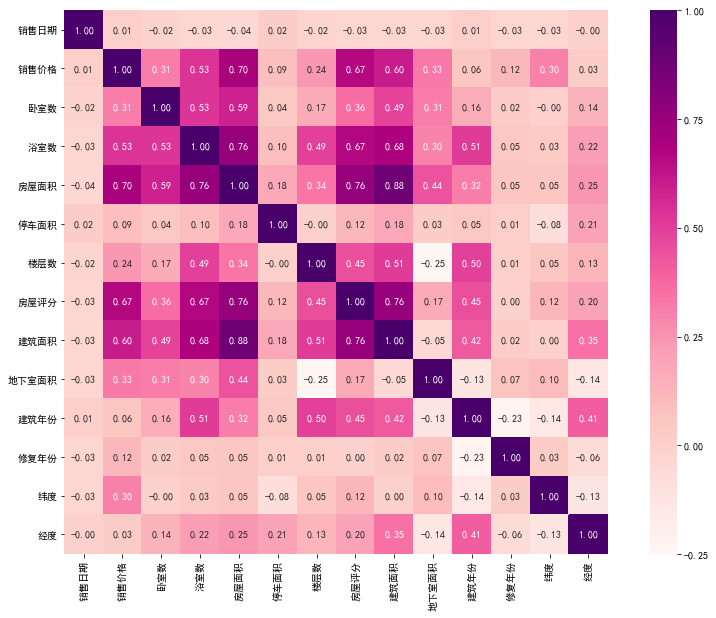

In [8]:
%pylab inline
# 设置图幅大小
pylab.rcParams['figure.figsize'] = (15, 10)
#设置坐标轴字体大小
#sns.set(font_scale=1.25)
corrmatrix = data.corr()
hm = sns.heatmap(corrmatrix,square=True,annot=True,cmap='RdPu',fmt='.2f',annot_kws={'size':10})
hm

由上图可以看出：

1. '房屋面积'、'房屋评分'这两个变量与'销售价格'有较强的线性关系，
   '建筑面积', '浴室数'与'销售价格'也有中强度的线性关系，

2. 但'房屋面积'和'建筑面积'的相关性有0.88，有很强的共线性，只取其一即可，取与目标变量关系更强的'房屋面积'；

3. 同时'房屋面积'与'浴室数'相关性达0.76，'房屋面积'与'房屋评分'的相关性也达0.76，也有很强的相关性，因此取'房屋面积'，

3. '销售日期'、'建筑年份'、'修复年份'、与'销售价格'没有明显的相关性，可以考虑删除；

4. 因此，选取的特征有：'卧室数', '房屋面积','停车面积', '楼层数', '地下室面积', '纬度','经度'。

# 先建模看看效果

## 采用LinearRegression建模

In [9]:
X = data.drop(columns = ['销售价格'])
y = data.销售价格

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                test_size=0.3, random_state=666)

In [11]:
#实例化
lr = LinearRegression()

In [12]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
lr.score(X_train,y_train)
lr.score(X_test,y_test)

0.6540336329364269

0.6373075754096125

## 采用随机森林回归建模看看

In [14]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
rdf = RandomForestRegressor(n_estimators= 100)

In [22]:
rdf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [23]:
rdf.score(X_train,y_train)

0.9774226531862746

In [24]:
rdf.score(X_test,y_test)

0.8079206381810303

发现随机森林回归模型效果要远远高于线性回归

# 数据清洗

## 删除无关变量

In [25]:
#删除’建筑面积'等变量
X2 = data.drop(columns = ['销售价格','建筑面积'])

In [26]:
X2.head()

,销售日期,卧室数,浴室数,房屋面积,停车面积,楼层数,房屋评分,地下室面积,建筑年份,修复年份,纬度,经度
0,20150302,3,2.25,1670,6240,1.0,8,430,1974,0,47.6413,-122.113
1,20150211,4,2.50,3300,10514,2.0,10,0,1984,0,47.6323,-122.036
2,20150107,3,3.25,3190,5283,2.0,9,0,2007,0,47.5534,-122.002
3,20141103,5,2.50,2900,9525,2.0,9,0,1989,0,47.5442,-122.138
4,20140603,5,2.75,2040,7488,1.0,7,840,1969,0,47.7289,-122.172


In [27]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y,
                                test_size=0.3, random_state=666)

## 数据标准化

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
std = StandardScaler()

In [30]:
X2_train_std = std.fit_transform(X2_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [31]:
X2_test_std = std.transform(X2_test)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


# 再建模看看

In [32]:
#实例化
lr = LinearRegression()
lr.fit(X2_train_std,y2_train)
lr.score(X2_train_std,y2_train)
lr.score(X2_test_std,y2_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

0.6540336329364264

0.6373075754096105

- 未删除变量前的模型评分
- 0.6540336329364269
- 0.6373075754096125
- 删除建筑面积这个高度共线的变量后，有微乎其微的提高
- 0.6540336329364264
- 0.6373075754096105

In [33]:
y2_train_pred = lr.predict(X2_train_std)

In [34]:
y2_test_pred = lr.predict(X2_test_std)

# 模型评估

## MSE

In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
mean_squared_error(y2_train,y2_train_pred)

49288756086.05018

In [37]:
mean_squared_error(y2_test,y2_test_pred)

47552125669.909355

## R方

In [38]:
lr.score(X2_train_std,y2_train)
lr.score(X2_test_std,y2_test)

0.6540336329364264

0.6373075754096105

In [39]:
# 用评估指标中的这个r2_score，即调整后R方
from sklearn.metrics import r2_score
r2_score(y2_test, y2_test_pred)

0.6373075754096105

In [40]:
np.array(y2_test)

array([615000, 550000, 340000, ..., 320000, 340000, 280000], dtype=int64)

In [41]:
np.array(y2_test_pred)

array([698863.78730455, 328579.79576448, 450887.91989731, ...,
       413982.91310897, 355433.78819008, 287001.45349708])

# 再用随机森林回归看看

In [42]:
rdf = RandomForestRegressor(n_estimators= 100)
rdf.fit(X2_train_std,y2_train)
rdf.score(X2_train_std,y2_train)
rdf.score(X2_test_std,y2_test)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

0.9772428198656693

0.81007570348258

- 发现随机森林的评分也比之前有一点点提升
- 0.9765216386764758
- 0.8100045423632241

# 构建多项式

In [43]:
from sklearn.preprocessing import PolynomialFeatures

In [175]:
train_scores = []
test_scores = []
# 定义成函数
for degree in range(2,7):
    """参数:degree 多项式次数
    """
    # 2次项
    # 构建多项式
    poly = PolynomialFeatures(degree=degree)
    # 转换数据
    X_train_poly = poly.fit_transform(X2_train_std)
    X_test_poly = poly.transform(X2_test_std)
    # 生成模型
    lr = LinearRegression()
    # 训练模型
    lr.fit(X_train_poly, y2_train)

    train_scores.append(lr.score(X_train_poly, y2_train))
    test_scores.append(lr.score(X_test_poly, y2_test))
    print(degree)


'参数:degree 多项式次数\n    '

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

2


'参数:degree 多项式次数\n    '

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

3


'参数:degree 多项式次数\n    '

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

4


'参数:degree 多项式次数\n    '

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

5


'参数:degree 多项式次数\n    '

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

6


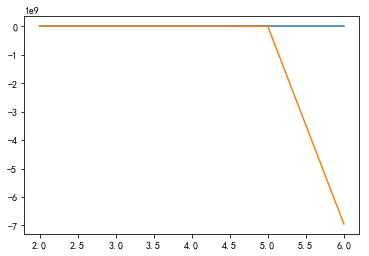

In [177]:
plt.plot(range(2,7),train_scores)
plt.plot(range(2,7),test_scores)

In [179]:
train_scores

[0.7677283490136775,
 0.8450354928696362,
 0.9272630146054909,
 0.9857926020899731,
 0.9999999978931774]

In [178]:
test_scores

[0.718762364825295,
 0.1668597630535913,
 -263.5075851022847,
 -4598488.924970205,
 -6945674256.563989]

# 构建二项式重新建模

根据上面信息，我们发现二项式最好，3项式及以上都过拟合

In [44]:
poly = PolynomialFeatures(degree=2)
# 转换数据
X_train_poly = poly.fit_transform(X2_train_std)
X_test_poly = poly.transform(X2_test_std)
# 生成模型
lr = LinearRegression()
# 训练模型
lr.fit(X_train_poly, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
lr.score(X_train_poly,y2_train)

0.7677283490136775

In [45]:
lr.score(X_test_poly, y2_test)

0.718762364825295

In [48]:
#训练集预测值
train_y_pred = lr.predict(X_train_poly) 

In [49]:
#测试集预测值
test_y_pred = lr.predict(X_test_poly)

# 再用随机森林回归看看

In [47]:
rdf = RandomForestRegressor(n_estimators= 100)
rdf.fit(X_train_poly,y2_train)
rdf.score(X_train_poly,y2_train)
rdf.score(X_test_poly,y2_test)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

0.9759200272016014

0.811367077909004

In [64]:
#训练集预测值
trainR_y_pred = rdf.predict(X_train_poly) 

In [65]:
#测试集预测值
testR_y_pred = rdf.predict(X_test_poly)

构建多项式后，随机森林效果有一点点上升，但效果都不算好

# 残差检验

## 线性回归残差

Text(0.5, 0, '预测值')

Text(0, 0.5, '残差')

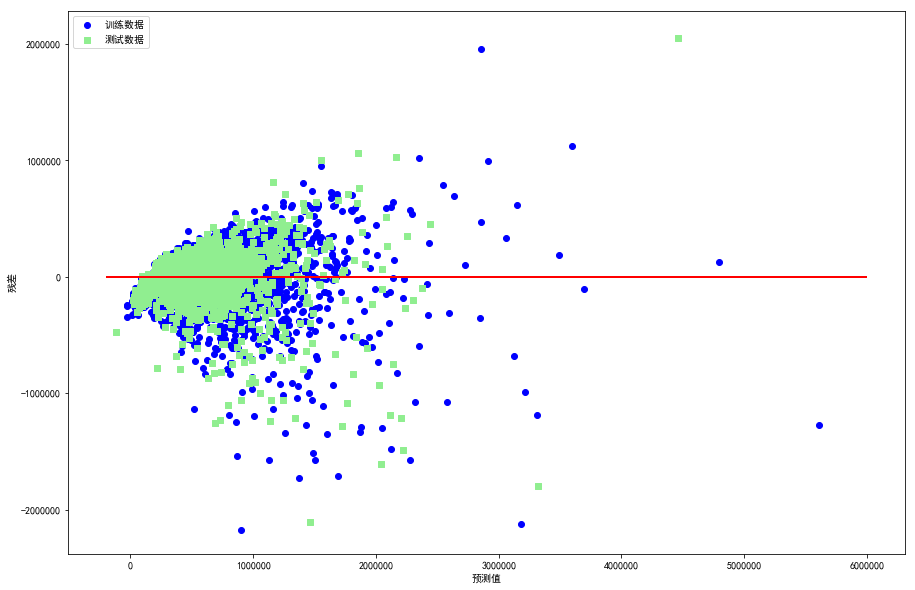

In [63]:
#通过绘制残差图，观察异常值
# 横坐标为预测值，纵坐标为预测值-真实值，差值越接近0越好
plt.scatter(train_y_pred,train_y_pred-y2_train,c="blue",marker="o",label="训练数据")
plt.scatter(test_y_pred,test_y_pred-y2_test,c="lightgreen",marker="s",label="测试数据")
plt.legend(loc="upper left")
# 绘制水平线y = 0
plt.hlines(y=0,xmin = -200000,xmax = 6000000,lw=2,color="red")
plt.xlabel("预测值")
plt.ylabel("残差")
plt.show()

In [72]:
#标准化残差：残差除以其标准差后得到的数值
#训练集残差标准化
Sy_pred_train = (train_y_pred-y2_train)/train_y_pred.std()
#测试集残差标准化
Sy_pred_test = (test_y_pred-y2_test)/test_y_pred.std()

<Figure size 720x504 with 0 Axes>

Text(0.5, 0, '预测值')

Text(0, 0.5, '标准化残差')

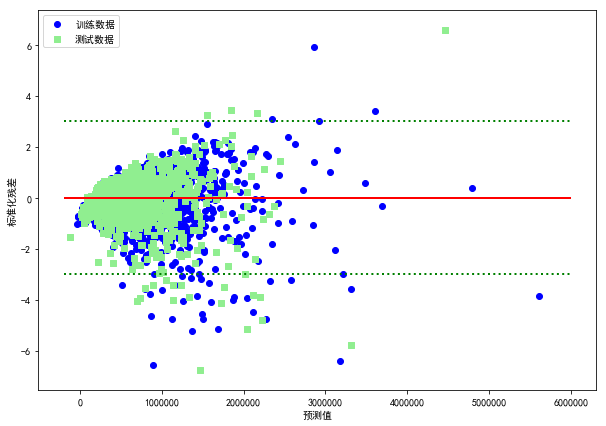

In [86]:
plt.figure(figsize=(10,7))
#通过绘制残差图，观察异常值
# 横坐标为预测值，纵坐标为预测值-真实值，差值越接近0越好
plt.scatter(train_y_pred,Sy_pred_train,c="blue",marker="o",label="训练数据")
plt.scatter(test_y_pred,Sy_pred_test,c="lightgreen",marker="s",label="测试数据")
plt.legend(loc="upper left")
# 绘制水平线y = 0
plt.hlines(y=0,xmin = -200000,xmax = 6000000,lw=2,color="red")
plt.hlines(y=3,xmin = -200000,xmax = 6000000,lw=2,color="green",linestyles='dotted')
plt.hlines(y=-3,xmin = -200000,xmax = 6000000,lw=2,color="green",linestyles='dotted')
plt.xlabel("预测值")
plt.ylabel("标准化残差")
plt.show()

## 随机森林残差

Text(0.5, 0, '预测值')

Text(0, 0.5, '残差')

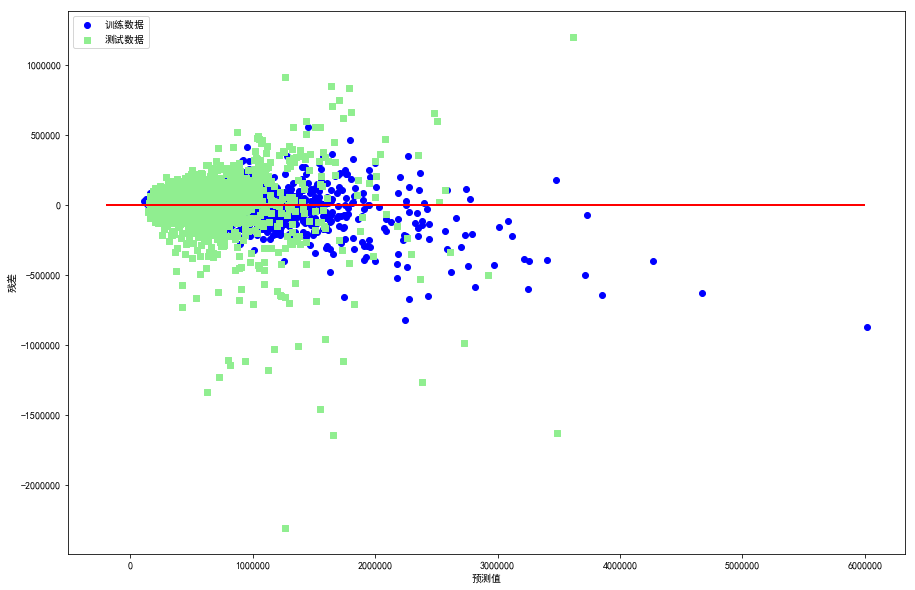

In [66]:
#通过绘制残差图，观察异常值
# 横坐标为预测值，纵坐标为预测值-真实值，差值越接近0越好
plt.scatter(trainR_y_pred,trainR_y_pred-y2_train,c="blue",marker="o",label="训练数据")
plt.scatter(testR_y_pred,testR_y_pred-y2_test,c="lightgreen",marker="s",label="测试数据")
plt.legend(loc="upper left")
# 绘制水平线y = 0
plt.hlines(y=0,xmin = -200000,xmax = 6000000,lw=2,color="red")
plt.xlabel("预测值")
plt.ylabel("残差")
plt.show()